# Spam Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.duplicated().sum()

415

In [6]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [7]:
X=df.drop('Category',axis=1)
y=df['Category']

<AxesSubplot: >

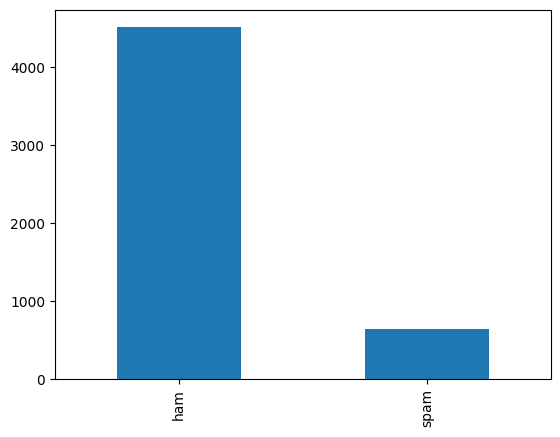

In [8]:
y.value_counts().plot(kind='bar')

In [9]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
stem=PorterStemmer()

In [11]:
corpus=[]
for i in range(len(df)):
    sentence=re.sub('[^a-zA-Z]',' ',df['Message'][i])
    sentence=sentence.lower()
    words=sentence.split()       #Tokenize
    words=[stem.stem(word)for word in words if word not in set(stopwords.words('english'))] #Stemming and removing stopwords
    sentence=' '.join(words)
    corpus.append(sentence)

In [12]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Vectorize

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv=CountVectorizer(max_features=5000)

In [15]:
X_final=cv.fit_transform(corpus).toarray()

In [16]:
print(X_final.shape)

(5157, 5000)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2,random_state=11)

# Model Training

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

# Performance Metrics And Accuracy

In [21]:
y_pred=clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
accuracy_score(y_test,y_pred)

0.9757751937984496

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       901
        spam       0.88      0.93      0.91       131

    accuracy                           0.98      1032
   macro avg       0.94      0.96      0.95      1032
weighted avg       0.98      0.98      0.98      1032



In [25]:
confusion_matrix(y_test,y_pred)

array([[885,  16],
       [  9, 122]], dtype=int64)